In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import random
import numpy as np
%matplotlib inline

In [2]:
!ls data

ls: cannot access 'data': No such file or directory


In [3]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/sample_submission.csv')

In [4]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
test_df.head()

,id_code,diagnosis
0,0005cfc8afb6,0
1,003f0afdcd15,0
2,006efc72b638,0
3,00836aaacf06,0
4,009245722fa4,0


In [6]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 2 columns):
id_code      1928 non-null object
diagnosis    1928 non-null int64
dtypes: int64(1), object(1)
memory usage: 30.2+ KB


(None, None)

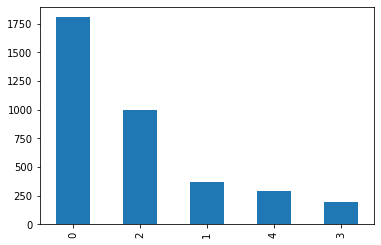

In [7]:
train_df['diagnosis'].value_counts().plot(kind="bar")

In [8]:
counts = np.unique(train_df['diagnosis'].values, return_counts=True)

In [9]:
counts

(array([0, 1, 2, 3, 4]), array([1805,  370,  999,  193,  295]))

In [10]:
i = 0
#img = mpimg.imread('../data/train_images/%s.png' % train_df.iloc[i]["id_code"])

img = cv2.imread('../data/train_images/%s.png' % train_df.iloc[i]["id_code"])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ****************************

In [11]:
img.shape


(2136, 3216, 3)

In [12]:
np.max(img), np.min(img)

(255, 0)

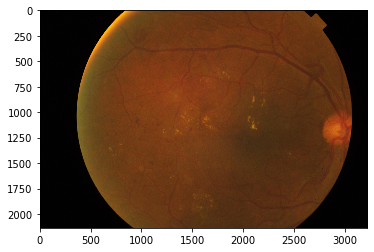

In [13]:
plt.imshow(img)

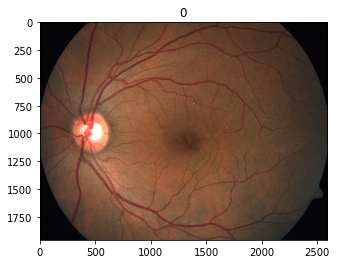

In [14]:
# plot some random training images with their ground truth labels
i = random.choice(range(train_df.shape[0]))
img = mpimg.imread('../data/train_images/' + train_df.iloc[i]['id_code'] + '.png')
plt.imshow(img)
plt.title(train_df.iloc[i]['diagnosis'])
plt.show()

In [15]:
train_df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

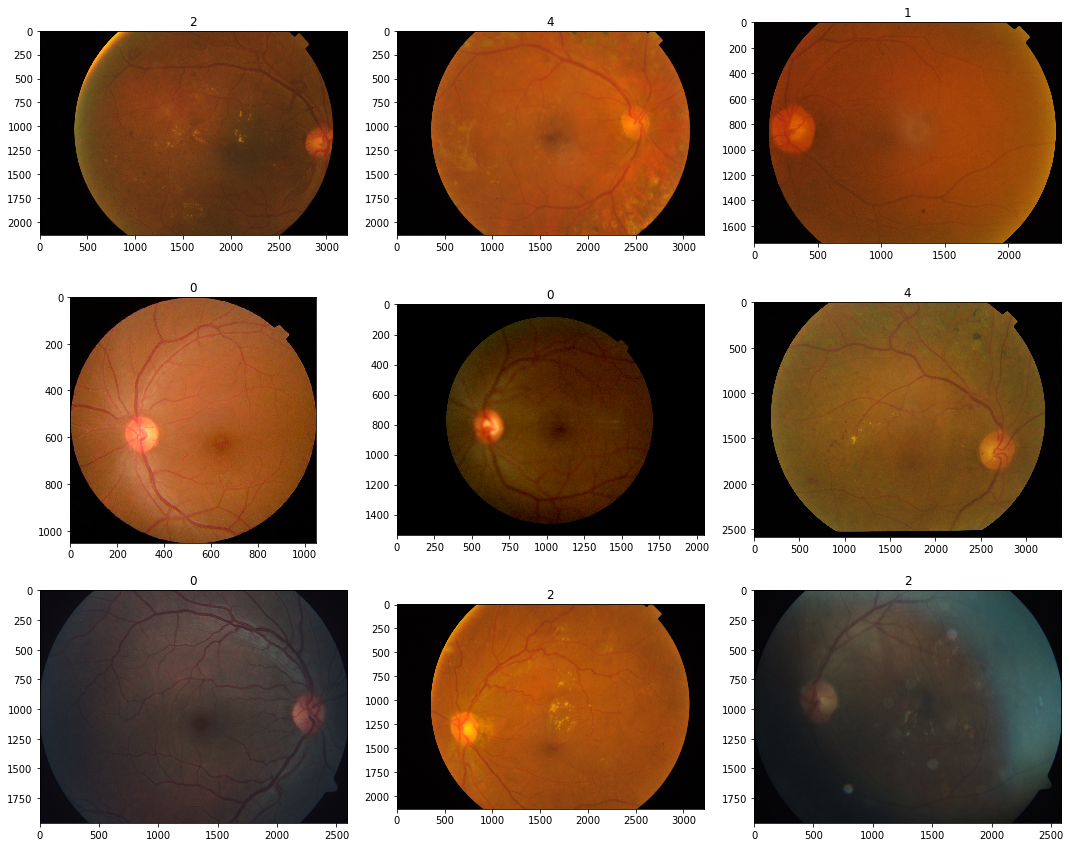

In [16]:
def display_samples(df, columns=3, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'../data/train_images/{image_path}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()

display_samples(train_df)

In [17]:
SEED=0
IMG_SIZE = 512
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 1000 # use 1000 when you just want to explore new idea, use -1 for full train



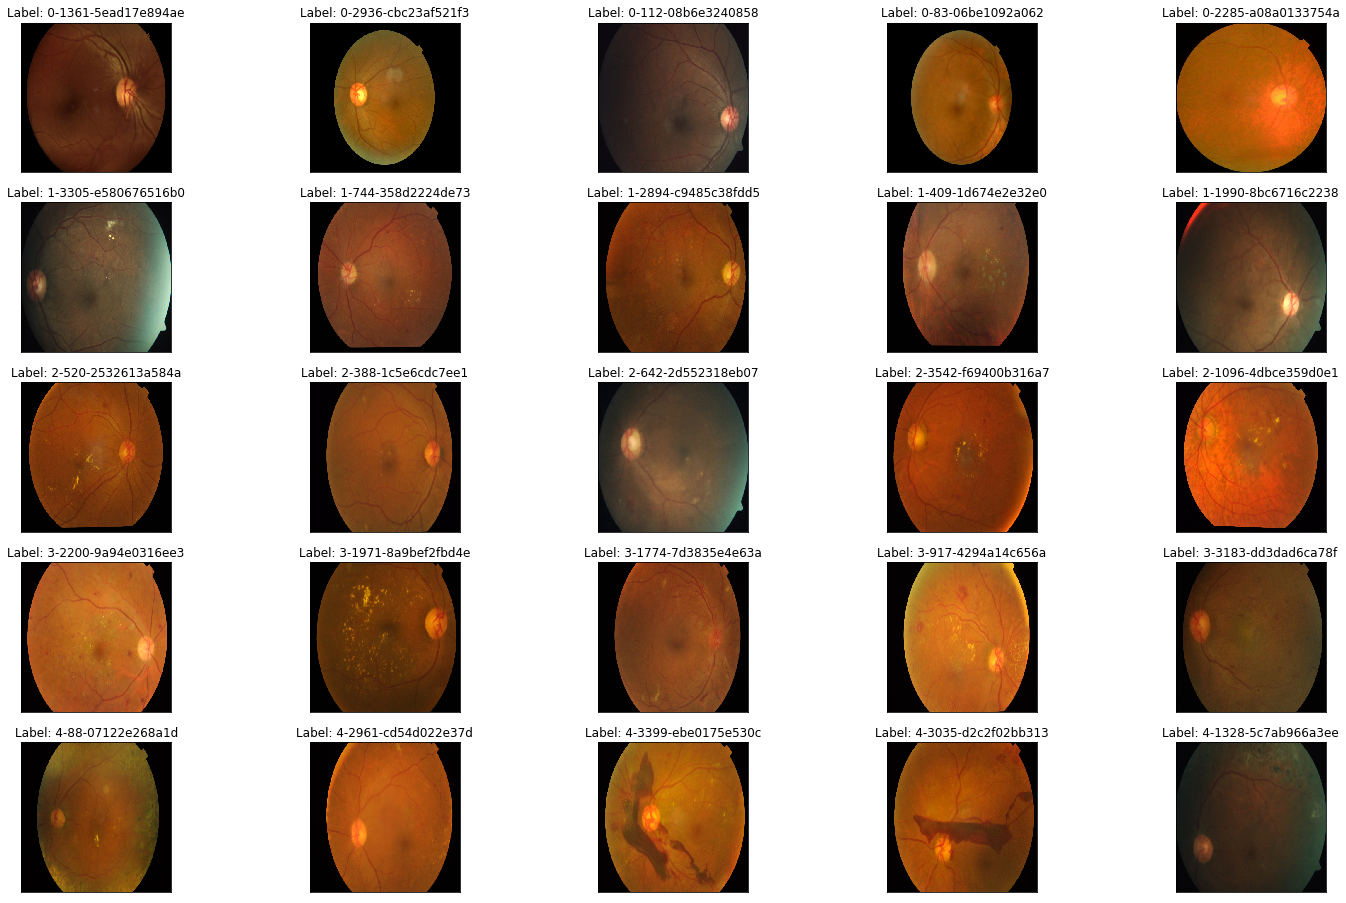

In [19]:

fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for class_id in sorted(train_df['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_df.loc[train_df['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"../data/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )
        

In [ ]:
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_df['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_df.loc[train_df['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"data/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         image=cv2.addWeighted ( image, 0 , cv2.GaussianBlur( image , (0 ,0 ) , 10) ,-4 ,128)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )



In [ ]:
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_df['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_df.loc[train_df['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"data/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128) # the trick is to add this line

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )

### Exploring old data

In [20]:
train_old = pd.read_csv('../data/train_old.csv')
train_old.shape

(35126, 2)

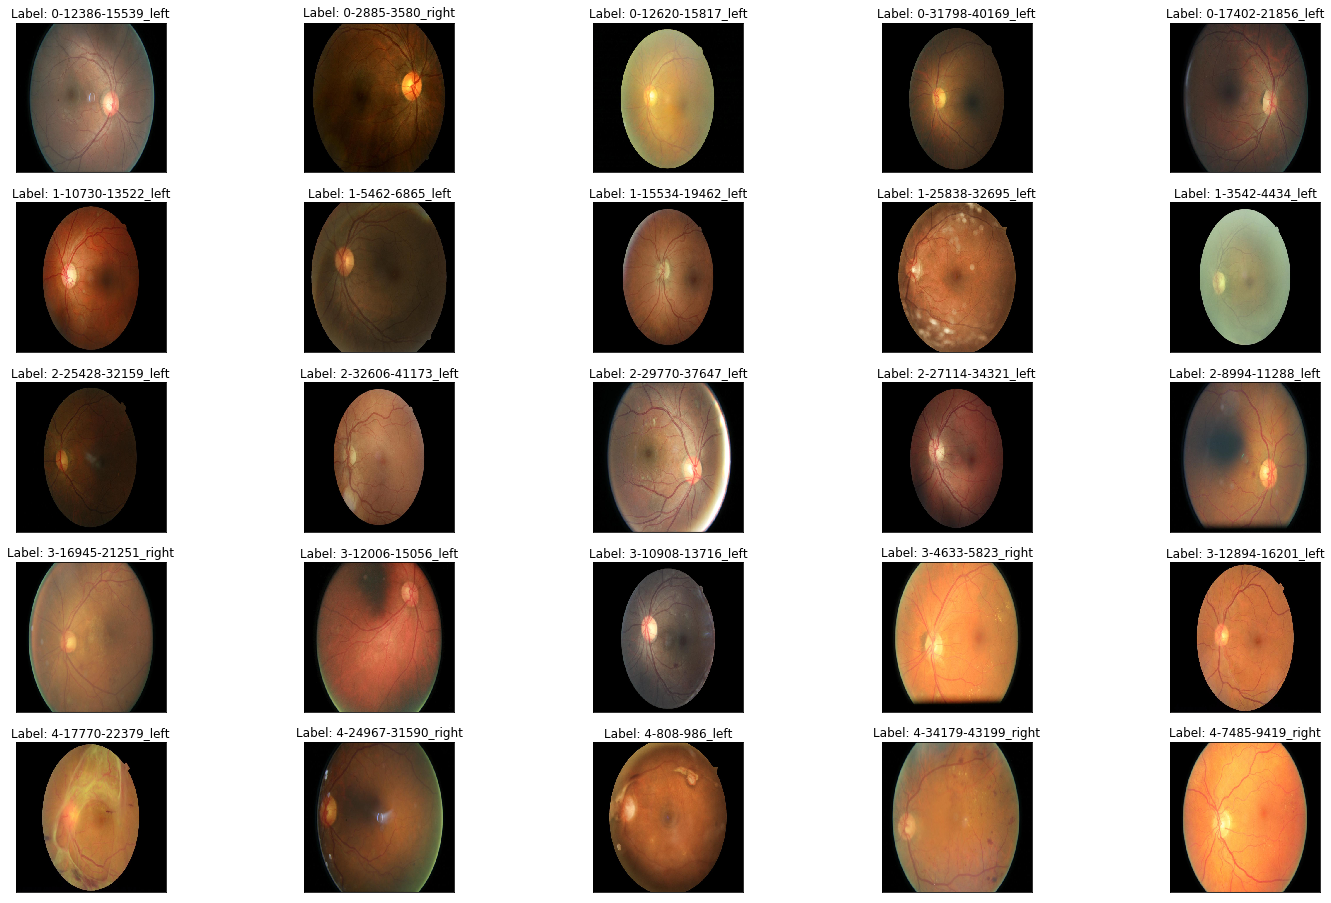

In [26]:

fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for class_id in sorted(train_old['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_old.loc[train_old['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"../external_data/train_images/{row['id_code']}.jpeg"
        #print(path)
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )
        

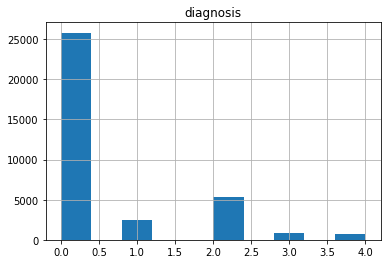

In [27]:
train_old[['diagnosis']].hist();

In [36]:
train_old['diagnosis'].value_counts()

0    25810
2     5292
1     2443
3      873
4      708
Name: diagnosis, dtype: int64

In [29]:
counts = train_df['diagnosis'].value_counts(normalize=True)
counts

0    0.492900
2    0.272802
1    0.101038
4    0.080557
3    0.052703
Name: diagnosis, dtype: float64

In [31]:
count_dict = {}
for i in counts.index:
    count_dict[i] = counts.loc[i]
    #print(i, counts.loc[i])
count_dict

{0: 0.4929000546149645,
 2: 0.272801747678864,
 1: 0.1010376843255052,
 4: 0.08055707263790278,
 3: 0.052703440742763515}

In [49]:
def sample(obj, replace=False, total=8000):
    return obj.sample(n=int(count_dict[obj.name] * total), replace=replace)

In [50]:
sampled_train = train_old.groupby('diagnosis').apply(sample).reset_index(drop=True)

In [53]:
sampled_train.shape

(7998, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1f029cd30>]],
      dtype=object)

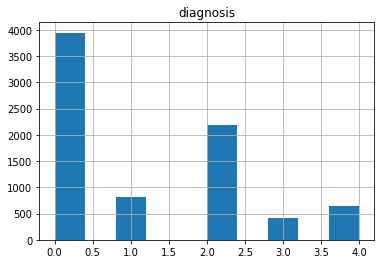

In [54]:
sampled_train[['diagnosis']].hist()

In [55]:
sampled_train['diagnosis'].value_counts()

0    3943
2    2182
1     808
4     644
3     421
Name: diagnosis, dtype: int64

In [ ]:
np.random.normal(0, 0.1)